In [1]:
import numpy   as np

import matplotlib.pyplot as plt

from sklearn.preprocessing  import scale
from sklearn.datasets       import load_iris

In [2]:
# load the data
X = load_iris().data

n, p = X.shape

# color for the plot
colors = ["blue", "green", "red", "orange", "yellow", "skyblue", "lightgreen", "salmon"]


def Kmeans(x1, x2, k, dist, max_iters=20):
    # Normalize variables
    x1 = scale(x1, with_mean=True, with_std=True)
    x2 = scale(x2, with_mean=True, with_std=True)

    # Init centroids by selecting random points
    ic = [np.random.choice(x1.shape[0]) for i in range(k)]
    centr = np.array([x1[ic, 0], x2[ic, 0]]).T

    # Plot starting point for centroids
    for c in range(k):
        plt.plot(centr[c, 0], centr[c, 1], marker="X", markersize=15, c=colors[c])

    # See the points to clasify
    # plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)

    centr_iter = [centr.T]

    # Move the centroids to the center in max_iters steps 
    for steps in range(max_iters + 1):
        # Find distances from centroids to points
        distances = np.array([dist(centr[i], [x1, x2]) for i in range(k)])

        # For each centroid, find the nearest points 
        c_nearest = np.array([np.argmin(d) for d in distances.T[0]])

        x1_ = [x1[c_nearest == i] for i in range(k)]
        x2_ = [x2[c_nearest == i] for i in range(k)]

        # Get the new position of the centroid by moving it to the center.
        # If a centroid don't have points near, the mean will return nan, so
        #  that's why nan_to_num is used
        c1_ = [np.nan_to_num(np.mean(x1_[i]), centr[i, 0]) for i in range(k)]
        c2_ = [np.nan_to_num(np.mean(x2_[i]), centr[i, 1]) for i in range(k)]

        # join c1_, c2 into an array (c1_, c2)
        centr = np.array([[x, y] for x, y in zip(c1_, c2_)])

        # Save the position of the centroid to plot it later
        centr_iter.append(centr.T)

    centr_iter = np.array(centr_iter).T

    # Plot the points clasified
    for c in range(k):
        p1, p2 = x1_[c], x2_[c]
        plt.scatter(p1[p1.nonzero()], p2[p2.nonzero()], color=colors[c], alpha=0.5)

    for c in range(k):
        # Plot the final position of the centroids
        plt.plot(centr[c, 0], centr[c, 1], marker="o", markersize=15, c=colors[c])
        # Plot the path made by the centroids towards the final position
        for iteration in centr_iter:
            plt.plot(iteration[0], iteration[1], linewidth=1, c='black', linestyle='--')
            
            
    plt.show()
                
    return centr, [x1_, x2_]  


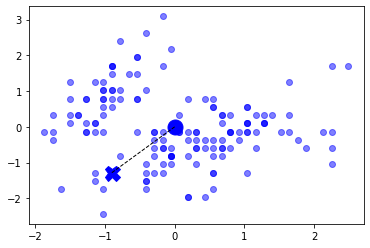

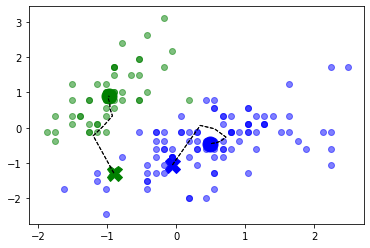

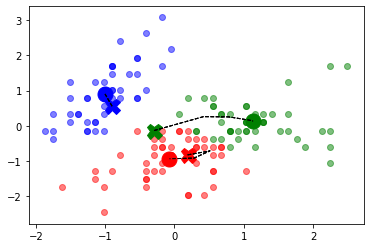

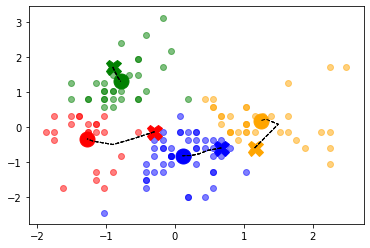

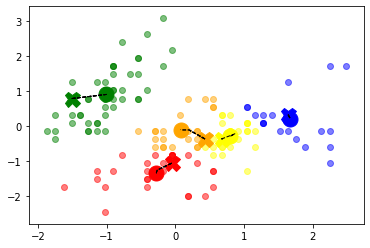

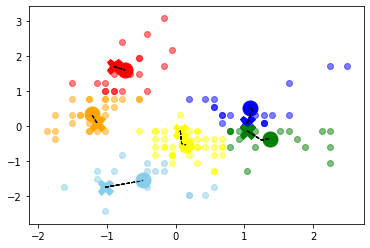

/home/linux/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/linux/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


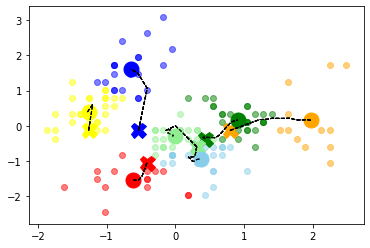

In [3]:

# Euclidian distant function
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)


#Test the function with 
results = [Kmeans(X[:, 0:1], X[:, 1:2], k, dist, 200) for k in range(1, len(colors))]
